In [1]:
from __future__ import print_function
import os
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Here I download the CSV and store it in PUIdata using the environmental variable

In [2]:
!curl https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD > garbage.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41414    0 41414    0     0   199k      0 --:--:-- --:--:-- --:--:--  200k


In [3]:
os.environ['PUIDATA'] = '%s/PUIdata'%os.getenv('HOME')
print('puidata:', os.getenv('PUIDATA'))

puidata: /nfshome/uak211/PUIdata


In [4]:
!mv garbage.csv $PUIDATA

In [5]:
!ls $PUIDATA

garbage.csv


#### Here I show the unreduced dataset

In [6]:
garbage = pd.read_csv('%s/garbage.csv'%os.getenv('PUIDATA'))
garbage.head(7)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1
2,2017 / 08,Queens,8,3805.1,461.0,412.8,NaN,NaN,NaN,NaN,4
3,2017 / 08,Brooklyn,18,5907.8,584.1,599.3,NaN,NaN,NaN,NaN,3
4,2017 / 08,Queens,5,4827.9,597.6,758.9,185.3,NaN,NaN,NaN,4
5,2017 / 08,Bronx,9,4003.6,215.7,335.8,NaN,NaN,NaN,NaN,2
6,2017 / 08,Brooklyn,2,2448.5,544.3,360.0,53.5,NaN,NaN,NaN,3


In [7]:
garbage.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

In [8]:
garbage.size

9086

#### Here I isolate two numeric variables in the dataset and show the last five rows of the reduced dataset

In [9]:
two_cols = garbage[['REFUSETONSCOLLECTED', 'MGPTONSCOLLECTED']]
two_cols.head()

,REFUSETONSCOLLECTED,MGPTONSCOLLECTED
0,4754.7,720.0
1,4996.5,530.3
2,3805.1,412.8
3,5907.8,599.3
4,4827.9,758.9


#### Plotting the two variables using the df.plot() function

[Text(0,0.5,'monthly recyclables tonnage'),
 Text(0.5,0,'monthly refuse tonnage'),
 Text(0.5,1,'Fig. 1: monthly recyclcables tonnage plotted against monthly refuse tonnage \n for NYC community districts from 8/2017 to 9/2018')]

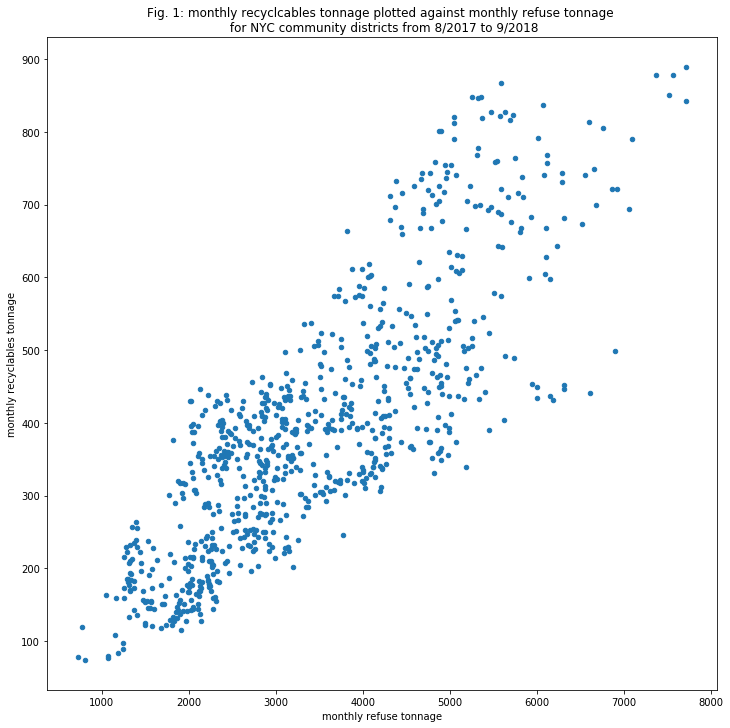

In [10]:
ax = two_cols.plot('REFUSETONSCOLLECTED', 'MGPTONSCOLLECTED', kind = 'scatter', figsize = (12, 12))
ax.set(xlabel = 'monthly refuse tonnage', ylabel ='monthly recyclables tonnage',
       title = 'Fig. 1: monthly recyclcables tonnage plotted against monthly refuse tonnage \n for NYC community districts from 8/2017 to 9/2018')

Fig. 1: number of tons of source-separated recyclables collected monthly per NYC community district plotted against number of tons of refuse collected monthly per NYC community district. The data show a strong positive correlation between amounts collected although refuse tonnage is approximately ten times the amount of recyclable tonnage.   

### Pulling NYC garbage tonnage data via the SODA API and plotting the aggregated data

In [11]:
url = 'https://data.cityofnewyork.us/resource/8bkb-pvci.json'
soda_garbage = pd.read_json(url)

In [12]:
# showing first 8 lines of table
soda_garbage.head(8)

,borough,borough_id,communitydistrict,leavesorganictons,mgptonscollected,month,papertonscollected,refusetonscollected,resorganicstons,schoolorganictons,xmastreetons
0,Queens,4,4,5.07,394.00,2017 / 11,349.78,3997.15,NaN,NaN,NaN
1,Queens,4,11,NaN,396.53,2017 / 10,483.03,2691.88,236.41,NaN,NaN
2,Queens,4,7,NaN,694.62,2017 / 08,808.68,7058.92,NaN,NaN,NaN
3,Bronx,2,1,NaN,131.22,2017 / 09,105.14,1870.63,NaN,NaN,NaN
4,Queens,4,6,NaN,367.11,2018 / 08,438.97,2951.58,NaN,NaN,NaN
5,Brooklyn,3,9,NaN,214.42,2018 / 07,235.52,2996.15,NaN,NaN,NaN
6,Manhattan,1,12,NaN,499.46,2017 / 12,494.35,4748.06,NaN,39.07,NaN
7,Staten Island,5,3,NaN,757.62,2018 / 08,796.56,6118.22,NaN,NaN,NaN


#### Here I drop all but the month, refuse tonnage, and recyclables tonnage variables

In [13]:
soda_garbage = soda_garbage.drop(soda_garbage.columns[[1, 2, 3, 6, 8, 9, 10]], axis = 1)

#### Here I aggregate tonnage data by grouping all community districts by month for a less cluttered plot

In [14]:
soda_garbage = soda_garbage.groupby(['month']).sum()[['mgptonscollected', 'refusetonscollected']].reset_index()

In [15]:
soda_garbage.head()

,month,mgptonscollected,refusetonscollected
0,2017 / 08,24698.48,218232.11
1,2017 / 09,23633.04,210634.84
2,2017 / 10,22866.86,210559.10
3,2017 / 11,23748.28,211434.82
4,2017 / 12,23974.60,199635.98


#### Here I plot refuse and recyclable tonnage amounts 

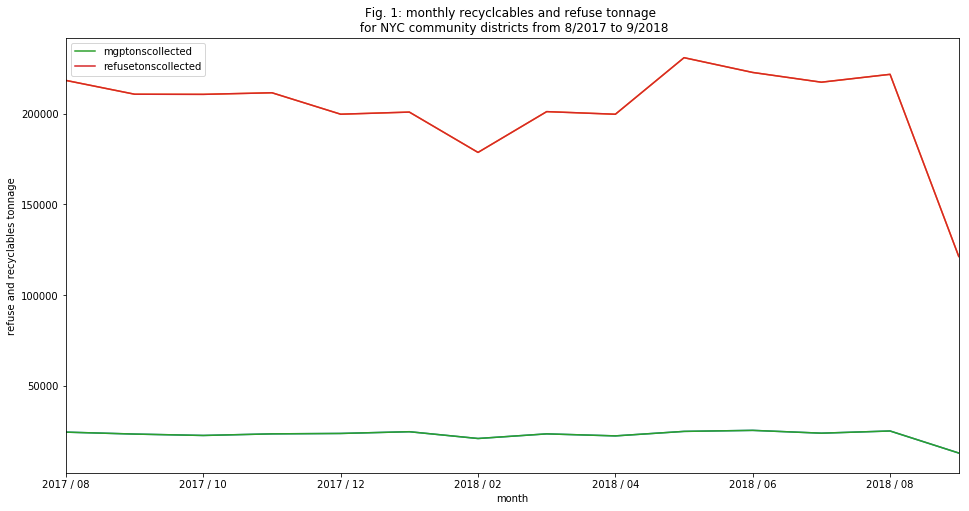

In [18]:
ax1 = soda_garbage.plot(legend = False)
ax1.set(ylabel = 'refuse and recyclables tonnage', title = 'Fig. 1: monthly recyclcables and refuse tonnage \n for NYC community districts from 8/2017 to 9/2018')
soda_garbage.plot('month', ax = ax1, figsize = (16, 8))